<a id = "1.0"></a>
<p style="font-size:15px;color:#34656d;font-family:'Comic Sans MS';text-align:right;border-radius:5px 5px;">
<i>Lobatto, Elias - Zerpa, Nadia - Quintana, Fabio</i><br>

<a id = "1.0"></a>
<p style="font-size:25px;color:#34656d;font-family:'Comic Sans MS';text-align:center;border-radius:5px 5px;">
<strong>Trabajo Práctico N°1</strong></p> 


In [1]:
import pandas as pd
# Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import numpy as np

np.set_printoptions(suppress = True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.24.3


In [3]:
# En produccion eliminar, se incluye por informacion
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Matplotlib version: 3.6.0


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


LECTURA DEL ARCHIVO:

In [7]:
df = pd.read_excel('./Datos.xls')  
print(df.head())

  TPo1 TPo2 TPo3 TPo4  Final  Quat
0   10    A    A    A      A  1Q23
1    A    A    A    A      A  1Q23
2   10   10    8   10  6.633  1Q23
3    8    A    A    A      A  1Q23
4    4    6    9    8      A  1Q23


In [9]:
df.sample(5) 

,TPo1,TPo2,TPo3,TPo4,Final,Quat
184,10,6,A,A,2,1Q23
297,A,A,A,A,A,2Q22
501,A,A,A,A,2,1Q22
258,A,A,A,A,7,2Q22
491,10,10,9,2,2,1Q22


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TPo1    576 non-null    object
 1   TPo2    576 non-null    object
 2   TPo3    571 non-null    object
 3   TPo4    569 non-null    object
 4   Final   576 non-null    object
 5   Quat    576 non-null    object
dtypes: object(6)
memory usage: 27.1+ KB


LIMPIEZA DE DATOS:

In [11]:
df['Final'].unique()

array(['A', 6.633147564581388, 6.915162037037037, 5.6375, 6,
       8.058333333333334, 2, 5.0398692810457515, 5.823611111111111,
       7.239460784313725, 7.674999999999999, 6.529166666666667,
       4.1499999999999995, 6.810128773731715, 7.637472766884532,
       6.1499999999999995, 6.0625, 6.815128968253968, 6.730621693121693,
       6.999257897603487, 7, 7.698958333333334, 7.375, 6.708660130718954,
       5.908862433862434, 5.142276007625273, 4.54047619047619,
       4.543229166666666, 6.35, 7.976365059912854, 5.8500000000000005,
       7.0447673513849995, 8.995833333333334, 5.183533691254279,
       7.802233115468409, 7.8500000000000005, 4.342708333333333,
       6.640277777777778, 7.919527116402116, 5.751388888888889, 4.8375,
       4.827662037037037, 6.901851851851853, 4.664089246809835,
       5.570039682539683, 7.490439231248055, 4.013029100529101,
       6.304166666666666, 4.188095238095238, 5.65, 7.574999999999999,
       8.604411764705882, 5.072425984282602, 3.96250000000000

In [12]:
# Se transforman en 0 los valores A (ausentes) y en formato entero
# Como hay valores nulos primero se los llena con cero
df.loc[df['TPo1'] == 'A', "TPo1"] = '0'
df[['TPo1']] = df[['TPo1']].astype(int)

df.loc[df['TPo2'] == 'A', "TPo2"] = '0'
df[['TPo2']] = df[['TPo2']].astype(int)

df.loc[df['TPo3'] == 'A', "TPo3"] = '0'
df.loc[df['TPo3'] == '', "TPo3"] = '0'
df['TPo3'] = df['TPo3'].fillna(0)


df[['TPo3']] = df[['TPo3']].astype(int)

df.loc[df['TPo4'] == 'A', "TPo4"] = '0'
df.loc[df['TPo4'] == '', "TPo4"] = '0'
df['TPo4'] = df['TPo4'].fillna(0)               
df[['TPo4']] = df[['TPo4']].astype(int)

df.loc[df['Final'] == 'A', "Final"] = '0'
df.loc[df['Final'] == '', "Final"] = '0'
df['Final'] = df['Final'].fillna(0)              
df[['Final']] = df[['Final']].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPo1    576 non-null    int32  
 1   TPo2    576 non-null    int32  
 2   TPo3    576 non-null    int32  
 3   TPo4    576 non-null    int32  
 4   Final   576 non-null    float64
 5   Quat    576 non-null    object 
dtypes: float64(1), int32(4), object(1)
memory usage: 18.1+ KB


In [14]:
# CREO LA COLUMNA DE CANTIDAD DE TP AUSENTES (O NO ENTREGADOS.)
# La inicializo en 4, y voy decrementando si encuentro un 0
# df["TPEntregados"] = df['TPo1']+df['TPo2']+df['TPo3']+df['TPo4']
df["TPEntregados"] = 4

In [15]:
# Decremento siempre que encuentro un 0
df.loc[df['TPo1'] == 0, 'TPEntregados'] -= 1
df.loc[df['TPo2'] == 0, 'TPEntregados'] -= 1
df.loc[df['TPo3'] == 0, 'TPEntregados'] -= 1
df.loc[df['TPo4'] == 0, 'TPEntregados'] -= 1

In [16]:
# CREO OTRA COLUMNA CON LOS PROMEDIOS
df["PromedioTPs"] = 0

In [17]:
df["PromedioTPs"] = (df['TPo1'] + df['TPo2'] + df['TPo3'] + df['TPo4']) / 4

In [18]:
# Agrego la columnas con las distintas condiciones finales
df["Promociona"] = 0
df["Aprueba"] = 0
df["Reprobado"] = 0
df["Ausente"] = 0
df.loc[df['Final'] > 6.5, "Promociona"] = 1
df.loc[(df['Final'] >= 4) & (df['Final'] <= 6.5), "Aprueba"] = 1
df.loc[(df['Final'] < 4) & (df['Final'] > 0) , "Reprobado"] = 1
df.loc[df['Final'] == 0, "Ausente"] = 1
# df[['TPo1']] = df[['TPo1']].astype(int)

In [19]:
df.sample(5) 

,TPo1,TPo2,TPo3,TPo4,Final,Quat,TPEntregados,PromedioTPs,Promociona,Aprueba,Reprobado,Ausente
256,0,0,0,0,7.000,2Q22,0,0.00,1,0,0,0
81,4,10,8,2,0.000,1Q23,4,6.00,0,0,0,1
279,0,0,0,0,9.000,2Q22,0,0.00,1,0,0,0
153,10,0,7,10,4.838,1Q23,3,6.75,0,1,0,0
215,10,7,10,10,6.618,1Q23,4,9.25,1,0,0,0


In [20]:
# df[['Quantity','UnitPrice']].describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95])
df.describe()

,TPo1,TPo2,TPo3,TPo4,Final,TPEntregados,PromedioTPs,Promociona,Aprueba,Reprobado,Ausente
count,576.000,576.000,576.000,576.000,576.000,576.000,576.000,576.000,576.000,576.000,576.000
mean,5.726,4.019,3.839,3.240,2.117,1.901,4.206,0.149,0.142,0.135,0.573
std,4.603,4.528,4.480,4.474,2.851,1.517,3.491,0.357,0.350,0.342,0.495
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,8.000,0.000,0.000,0.000,0.000,2.000,4.250,0.000,0.000,0.000,1.000
75%,10.000,10.000,9.000,10.000,4.628,3.000,7.312,0.000,0.000,0.000,1.000
max,10.000,10.000,10.000,10.000,10.000,4.000,10.000,1.000,1.000,1.000,1.000


In [21]:
#QUITA COLUMNAS NO DESEADAS
#columns = ['Rank']
#df.drop(columns, inplace=True, axis=1)

In [22]:
# Armo un dataframe sólo con los que promocionaron.
dfPromo = df
dfPromo = dfPromo.drop(['Final', 'Aprueba', 'Reprobado', 'Ausente'], axis = 1)
dfPromo.sample(5)

,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona
2,10,10,8,10,1Q23,4,9.5,1
563,0,0,0,0,1Q22,0,0.0,0
48,8,6,0,0,1Q23,2,3.5,0
492,0,0,0,0,1Q22,0,0.0,0
529,0,0,0,0,1Q22,0,0.0,0


PANDAS PROFILING:

In [23]:
import ydata_profiling as pp

In [24]:
pp.ProfileReport(dfPromo)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
data_train = dfPromo.sample(frac = 0.95, random_state = 786)

In [26]:
data_test = dfPromo.drop(data_train.index)

In [27]:
data_train.sample(5)

,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona
550,0,9,8,8,1Q22,3,6.25,1
394,0,0,0,0,1Q22,0,0.00,0
319,10,7,0,0,2Q22,2,4.25,0
182,0,0,0,0,1Q23,0,0.00,0
200,10,10,10,10,1Q23,4,10.00,0


In [28]:
data_train = data_train.reset_index(drop = True)

In [29]:
data_train.sample(5)

,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona
227,4,10,9,10,2Q22,4,8.25,0
250,0,0,0,0,2Q22,0,0.00,0
220,0,0,0,0,1Q22,0,0.00,0
281,10,0,0,0,1Q23,1,2.50,0
158,0,6,7,10,2Q22,3,5.75,0


In [30]:
data_test = data_test.reset_index(drop = True)

In [31]:
from pycaret.classification import *

In [32]:
expPromo_clf100 = setup(data = data_train, 
                       target = 'Promociona', 
                       session_id = 100)

,Description,Value
0,Session id,100
1,Target,Promociona
2,Target type,Binary
3,Original data shape,"(547, 8)"
4,Transformed data shape,"(547, 10)"
5,Transformed train set shape,"(382, 10)"
6,Transformed test set shape,"(165, 10)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [33]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [34]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8508,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0240
dummy,Dummy Classifier,0.8508,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0240
lr,Logistic Regression,0.8482,0.6865,0.0000,0.0000,0.0000,-0.0047,-0.0071,0.5300
lda,Linear Discriminant Analysis,0.8482,0.6845,0.0000,0.0000,0.0000,-0.0047,-0.0071,0.0230
dt,Decision Tree Classifier,0.8432,0.6586,0.2100,0.4733,0.2784,0.2096,0.2382,0.0230
gbc,Gradient Boosting Classifier,0.8431,0.7502,0.1767,0.4167,0.2383,0.1726,0.1936,0.0420
knn,K Neighbors Classifier,0.8430,0.6561,0.1067,0.2417,0.1450,0.0997,0.1082,0.0320
rf,Random Forest Classifier,0.8404,0.7064,0.0867,0.2083,0.1208,0.0772,0.0866,0.0700
et,Extra Trees Classifier,0.8325,0.6884,0.1033,0.2000,0.1352,0.0771,0.0784,0.0700
lightgbm,Light Gradient Boosting Machine,0.8300,0.7060,0.1200,0.2200,0.1534,0.0890,0.0922,0.0550


In [35]:
gbc_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8205,0.6818,0.0000,0.0000,0.0000,-0.0460,-0.0692
1,0.7949,0.5657,0.1667,0.2500,0.2000,0.0877,0.0901
2,0.8947,0.8121,0.4000,0.6667,0.5000,0.4453,0.4634
3,0.8947,0.8152,0.2000,1.0000,0.3333,0.3028,0.4223
4,0.8421,0.7727,0.0000,0.0000,0.0000,-0.0459,-0.0640
5,0.8421,0.8229,0.1667,0.5000,0.2500,0.1857,0.2211
6,0.8421,0.7969,0.1667,0.5000,0.2500,0.1857,0.2211
7,0.8947,0.8802,0.5000,0.7500,0.6000,0.5422,0.5570
8,0.8421,0.6719,0.1667,0.5000,0.2500,0.1857,0.2211


In [36]:
gbc_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

HIPERPARAMETRIZACIÓN:

In [37]:
tuned_gbc_model = tune_model(gbc_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8462,0.6616,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8462,0.5960,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8684,0.8576,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8684,0.7909,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8684,0.7424,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8421,0.8281,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8421,0.7370,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8684,0.8854,0.1667,1.0000,0.2857,0.2520,0.3797
8,0.8421,0.6927,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


GRÁFICOS GBC MODEL:

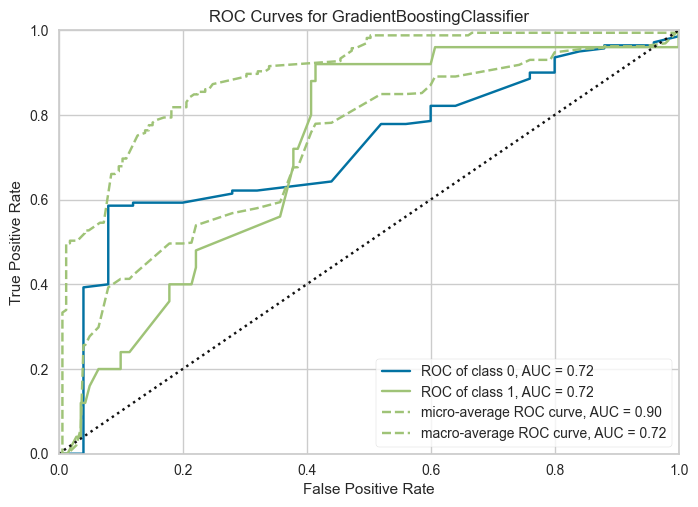

In [38]:
plot_model(gbc_model, plot = 'auc')

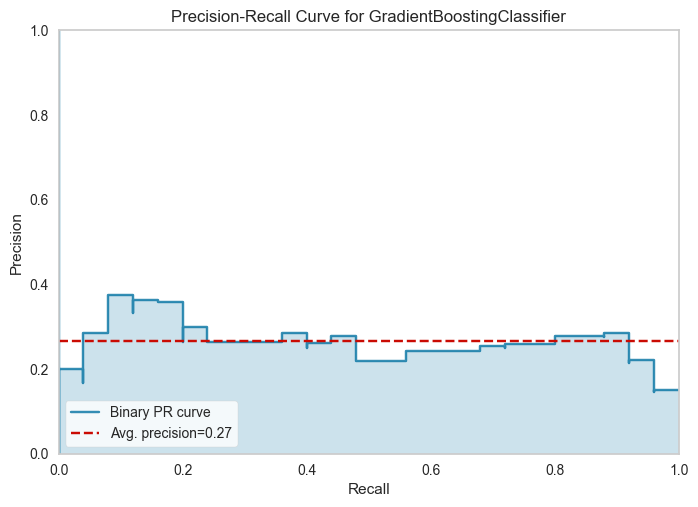

In [39]:
plot_model(gbc_model, plot = 'pr')

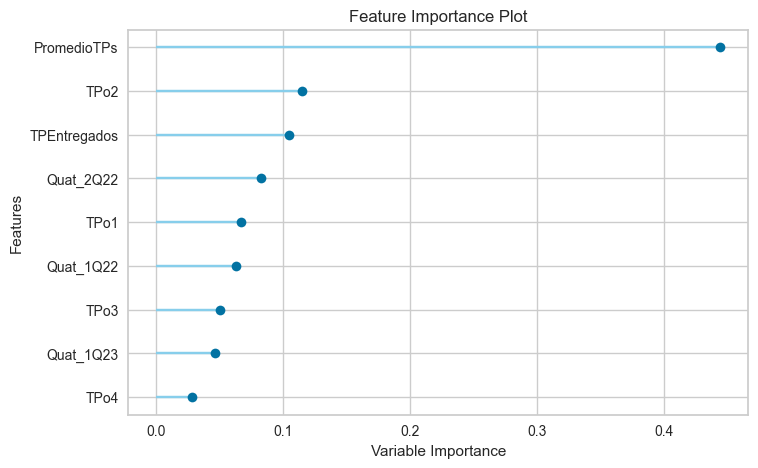

In [40]:
plot_model(gbc_model, plot = 'feature')

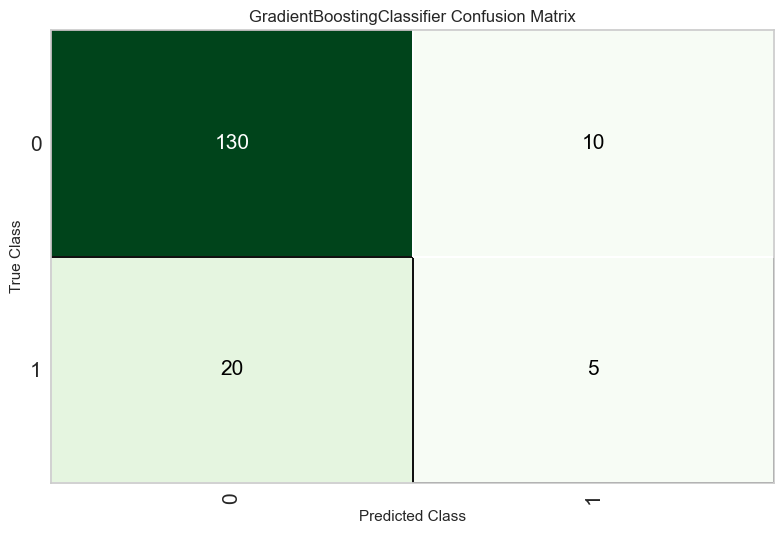

In [41]:
plot_model(gbc_model, plot = 'confusion_matrix')

In [50]:
evaluate_model(tuned_gbc_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

PREDICCIONES:

In [51]:
predict_model(gbc_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8182,0.7184,0.2000,0.3333,0.2500,0.1538,0.1604


,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona,prediction_label,prediction_score
194,8,10,0,0,1Q23,2,4.50,1,0,0.998
122,10,10,8,10,1Q23,4,9.50,0,0,0.766
8,0,10,10,10,2Q22,3,7.50,1,1,0.575
399,0,0,0,0,1Q23,0,0.00,0,0,0.990
239,0,0,0,0,1Q23,0,0.00,0,0,0.990
...,...,...,...,...,...,...,...,...,...,...
108,10,7,0,0,2Q22,2,4.25,0,0,0.996
363,10,10,0,0,2Q22,2,5.00,0,0,0.994
336,10,8,0,0,1Q23,2,4.50,0,0,0.996
397,10,0,0,0,1Q22,1,2.50,0,0,0.953


In [52]:
final_model = finalize_model(gbc_model)

In [53]:
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['TPo1', 'TPo2', 'TPo3', 'TPo4',
                                             'TPEntregados', 'PromedioTPs'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 Trans...
                                            criterion='friedman_mse', init=None,


In [54]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8909,0.9084,0.4000,0.7692,0.5263,0.4715,0.5038


,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona,prediction_label,prediction_score
194,8,10,0,0,1Q23,2,4.50,1,0,0.852
122,10,10,8,10,1Q23,4,9.50,0,0,0.669
8,0,10,10,10,2Q22,3,7.50,1,1,0.506
399,0,0,0,0,1Q23,0,0.00,0,0,0.985
239,0,0,0,0,1Q23,0,0.00,0,0,0.985
...,...,...,...,...,...,...,...,...,...,...
108,10,7,0,0,2Q22,2,4.25,0,0,0.996
363,10,10,0,0,2Q22,2,5.00,0,0,0.996
336,10,8,0,0,1Q23,2,4.50,0,0,0.991
397,10,0,0,0,1Q22,1,2.50,0,0,0.981


In [55]:
unseen_predictions = predict_model(final_model, data = data_test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8966,0.7450,0.2500,1.0000,0.4000,0.3650,0.4725


,TPo1,TPo2,TPo3,TPo4,Quat,TPEntregados,PromedioTPs,Promociona,prediction_label,prediction_score
0,10,8,10,6,1Q23,4,8.5,0,0,0.831
1,8,4,0,0,1Q23,2,3.0,0,0,0.968
2,8,6,0,0,1Q23,2,3.5,0,0,0.968
3,0,0,0,0,1Q23,0,0.0,0,0,0.985
4,10,0,0,0,1Q23,1,2.5,0,0,0.990


In [56]:
save_model(final_model,'./FinalGBCModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['TPo1', 'TPo2', 'TPo3', 'TPo4',
                                              'TPEntregados', 'PromedioTPs'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Trans...
                                             criterion='friedman_ms